# Capital One Data Science

## Question 1: Load

* Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here

* Please describe the structure of the data. Number of records and fields in each record?

* Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [1]:
#load all the required packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [2]:
#Importing in chunk sizes to avoid memory overflow

def import_data(data):
    df_batch = []
    df = pd.DataFrame()
    for part_load in pd.read_json(data, lines=True,chunksize=100000) :
        df_batch.append(part_load)
    df = pd.concat(df_batch,sort=False)
    return df

trans = import_data('transactions.txt')

In [3]:
#Getting record count and feature count for dataset

print('The given data set has :',trans.shape[0],'rows and',trans.shape[1],'columns')

The given data set has : 786363 rows and 29 columns


In [4]:
#Getting features of the dataset
print('The features of the dataset are: \n')
col_list = trans.columns.values.tolist()
print(*col_list, sep='\n')

The features of the dataset are: 

accountNumber
customerId
creditLimit
availableMoney
transactionDateTime
transactionAmount
merchantName
acqCountry
merchantCountryCode
posEntryMode
posConditionCode
merchantCategoryCode
currentExpDate
accountOpenDate
dateOfLastAddressChange
cardCVV
enteredCVV
cardLast4Digits
transactionType
echoBuffer
currentBalance
merchantCity
merchantState
merchantZip
cardPresent
posOnPremises
recurringAuthInd
expirationDateKeyInMatch
isFraud


In [5]:
#Since the blank values were not being considered null -> replaced them by nulls for our analysis
trans.replace("",np.nan,inplace = True)

In [6]:
#Descriptive stats
trans.describe(include = 'all')

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363,786363.000000,786363,781801,785639,782309,...,0.0,786363.000000,0.0,0.0,0.0,786363,0.0,0.0,786363,786363
unique,NaN,NaN,NaN,NaN,776637,NaN,2490,4,4,5,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,2016-12-25T14:04:15,NaN,Uber,US,US,05,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,False
freq,NaN,NaN,NaN,NaN,4,NaN,25613,774709,778511,315035,...,NaN,NaN,NaN,NaN,NaN,433495,NaN,NaN,785320,773946
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,NaN,136.985791,NaN,NaN,NaN,NaN,...,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,NaN,147.725569,NaN,NaN,NaN,NaN,...,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,NaN,33.650000,NaN,NaN,NaN,NaN,...,NaN,689.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,NaN,87.900000,NaN,NaN,NaN,NaN,...,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,NaN,191.480000,NaN,NaN,NaN,NaN,...,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Getting count of null values
trans.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

### Note:
Here it can be seen that `echoBuffer`, `merchantCity`, `merchantState`, `merchantZip`, `posOnPremises`, `recurringAuthInd` have only null values. Hence, they can be safely removed from dataset for feature reduction. For the remaining columns, we would be adding mode for rest of the columns since all are categorical


In [8]:
#Removing null columns and treating missing values
#Dropping account number as it is identical to customerId
col_list_na = ['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','transactionType'] 

for col in col_list_na:
    trans[col].fillna(trans[col].mode()[0], inplace = True)
trans_updated = trans.drop(['accountNumber','echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis = 1)
# Putting in key here to ensure mapping to data post de-duplication (maintaining referential integrity)
trans_updated['Key'] = trans_updated.index
trans_updated.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Key
0,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,...,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,0
1,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,...,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,1
2,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,...,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2
3,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,...,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,3
4,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,...,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,4


In [9]:
trans_updated.isnull().sum() #Removed all nullities in the table

customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
Key                         0
dtype: int64

### Exploratory Data Analysis

#### a) Credit Limit vs Fraud Rate

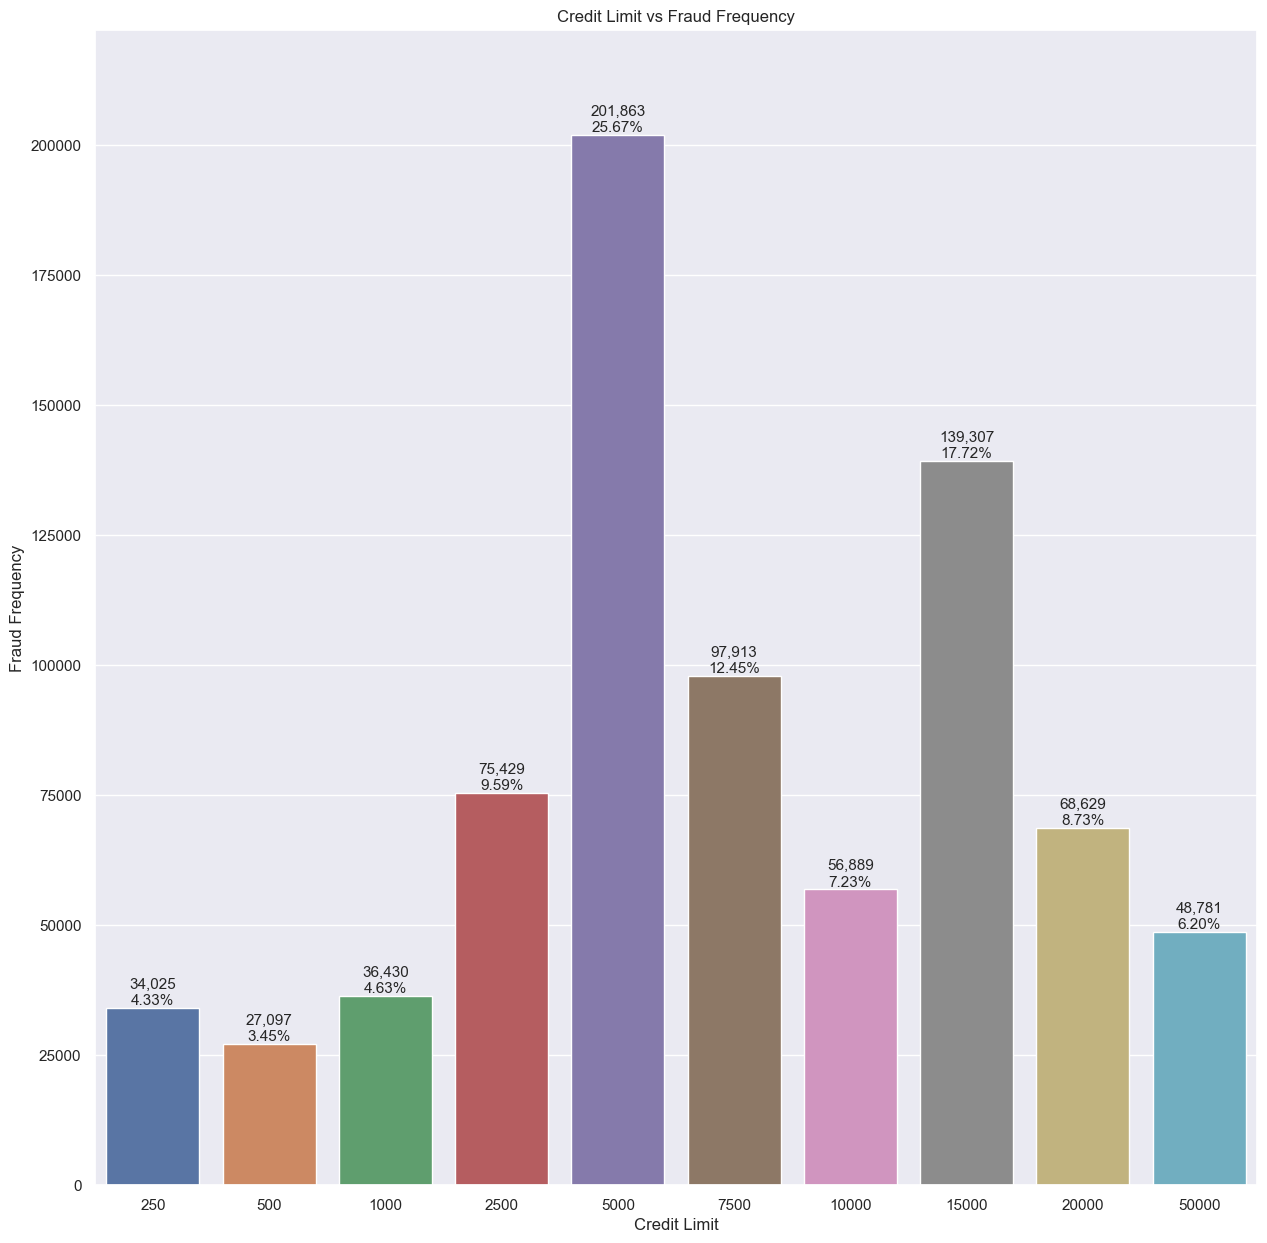

In [10]:
df_graph = pd.DataFrame(trans_updated.groupby('creditLimit').count()['isFraud']).reset_index(drop=False)
df_graph.columns=['creditLimit','Fraud_Freq']
plt.figure(figsize=(15,15))
sns.set_theme()
axes = sns.barplot(x="creditLimit", y="Fraud_Freq", data=df_graph)
axes.set_title('Credit Limit vs Fraud Frequency')
axes.set(xlabel='Credit Limit', ylabel='Fraud Frequency')
axes.set_ylim(top=max(df_graph.Fraud_Freq) * 1.10)
for bar, frequency in zip(axes.patches, df_graph.Fraud_Freq):
    text_x = bar.get_x() + bar.get_width() / 2.0
    text_y = bar.get_height()
    text = (f'{frequency:,}\n{frequency / sum(df_graph.Fraud_Freq):.2%}')
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

### Note:

* Credit Limits of \\$5000, \\$7500 and \\$15000 overall have around 55\% of the fradulent cases

#### b) Acquirer Country Code vs Fraud Rate

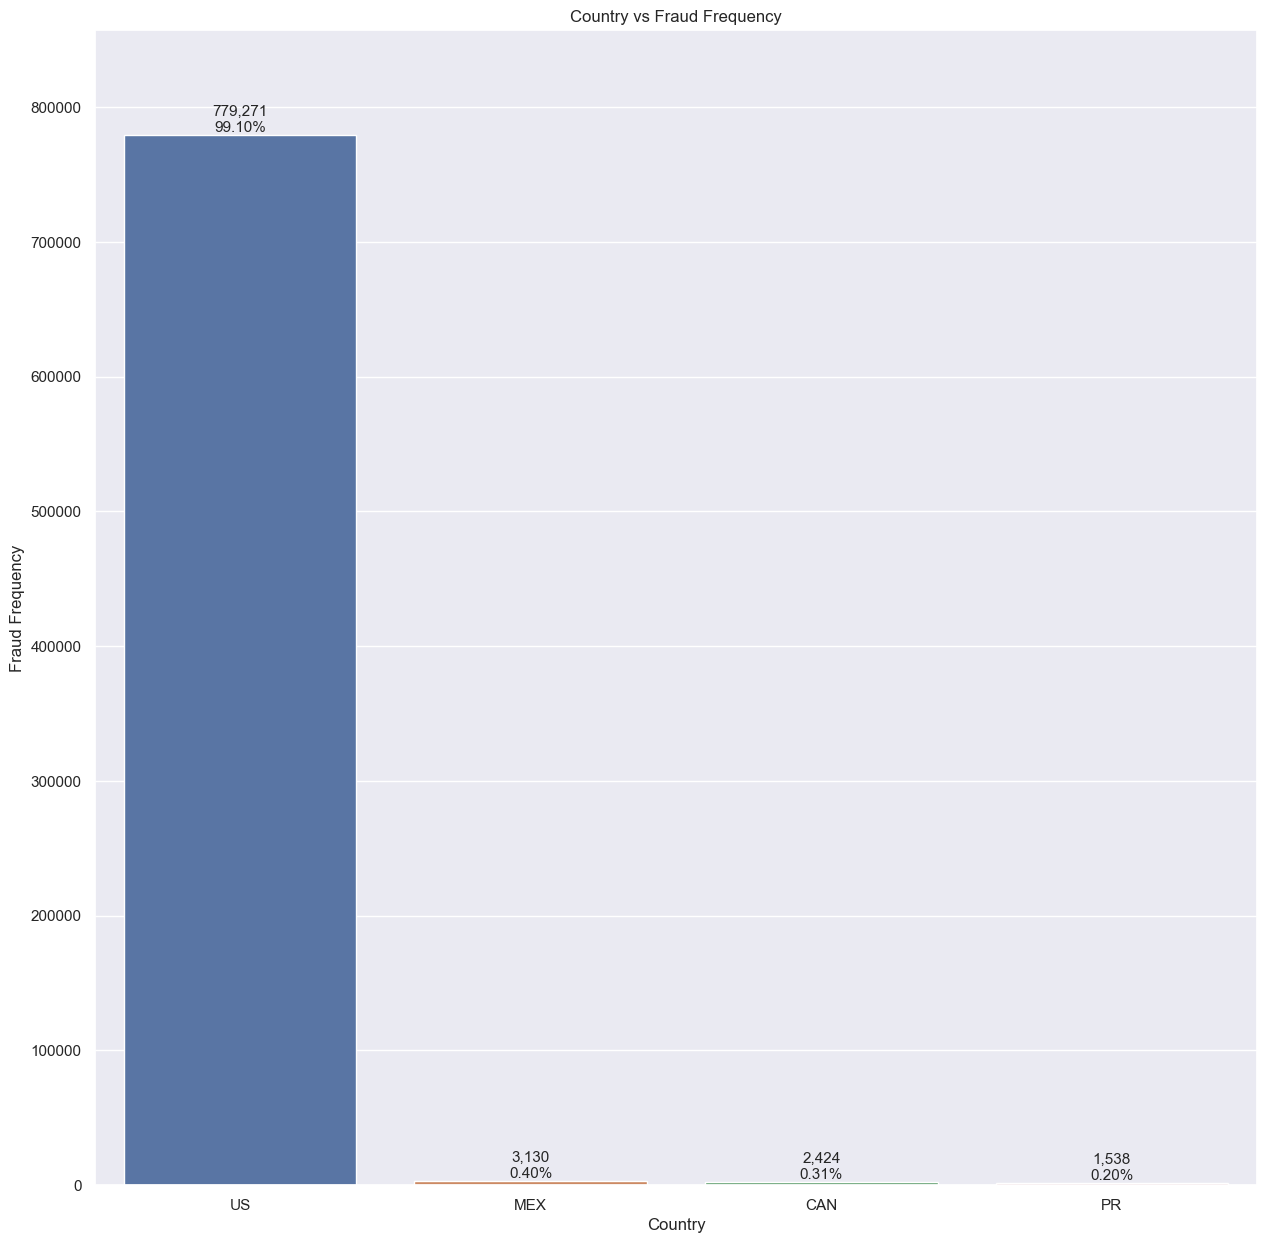

In [11]:
df_graph = pd.DataFrame(trans_updated.groupby('acqCountry').count()['isFraud']).reset_index(drop=False)
df_graph.columns=['Country','Fraud_Freq']
plt.figure(figsize=(15,15))
sns.set_theme()
axes = sns.barplot(x = 'Country', y = 'Fraud_Freq', data=df_graph, order = df_graph.sort_values('Fraud_Freq',ascending = False).Country)
axes.set_title('Country vs Fraud Frequency')
axes.set(xlabel='Country', ylabel='Fraud Frequency')
axes.set_ylim(top=max(df_graph.Fraud_Freq) * 1.10)
for bar, frequency in zip(axes.patches, df_graph.sort_values('Fraud_Freq',ascending = False).Fraud_Freq):
    text_x = bar.get_x() + bar.get_width() / 2.0
    text_y = bar.get_height()
    text = (f'{frequency:,}\n{frequency / sum(df_graph.Fraud_Freq):.2%}')
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

### Note:

* Acquirers country of US contributes maximum to the fraudulent cases

#### c) Merchant Category vs Fraud Rate

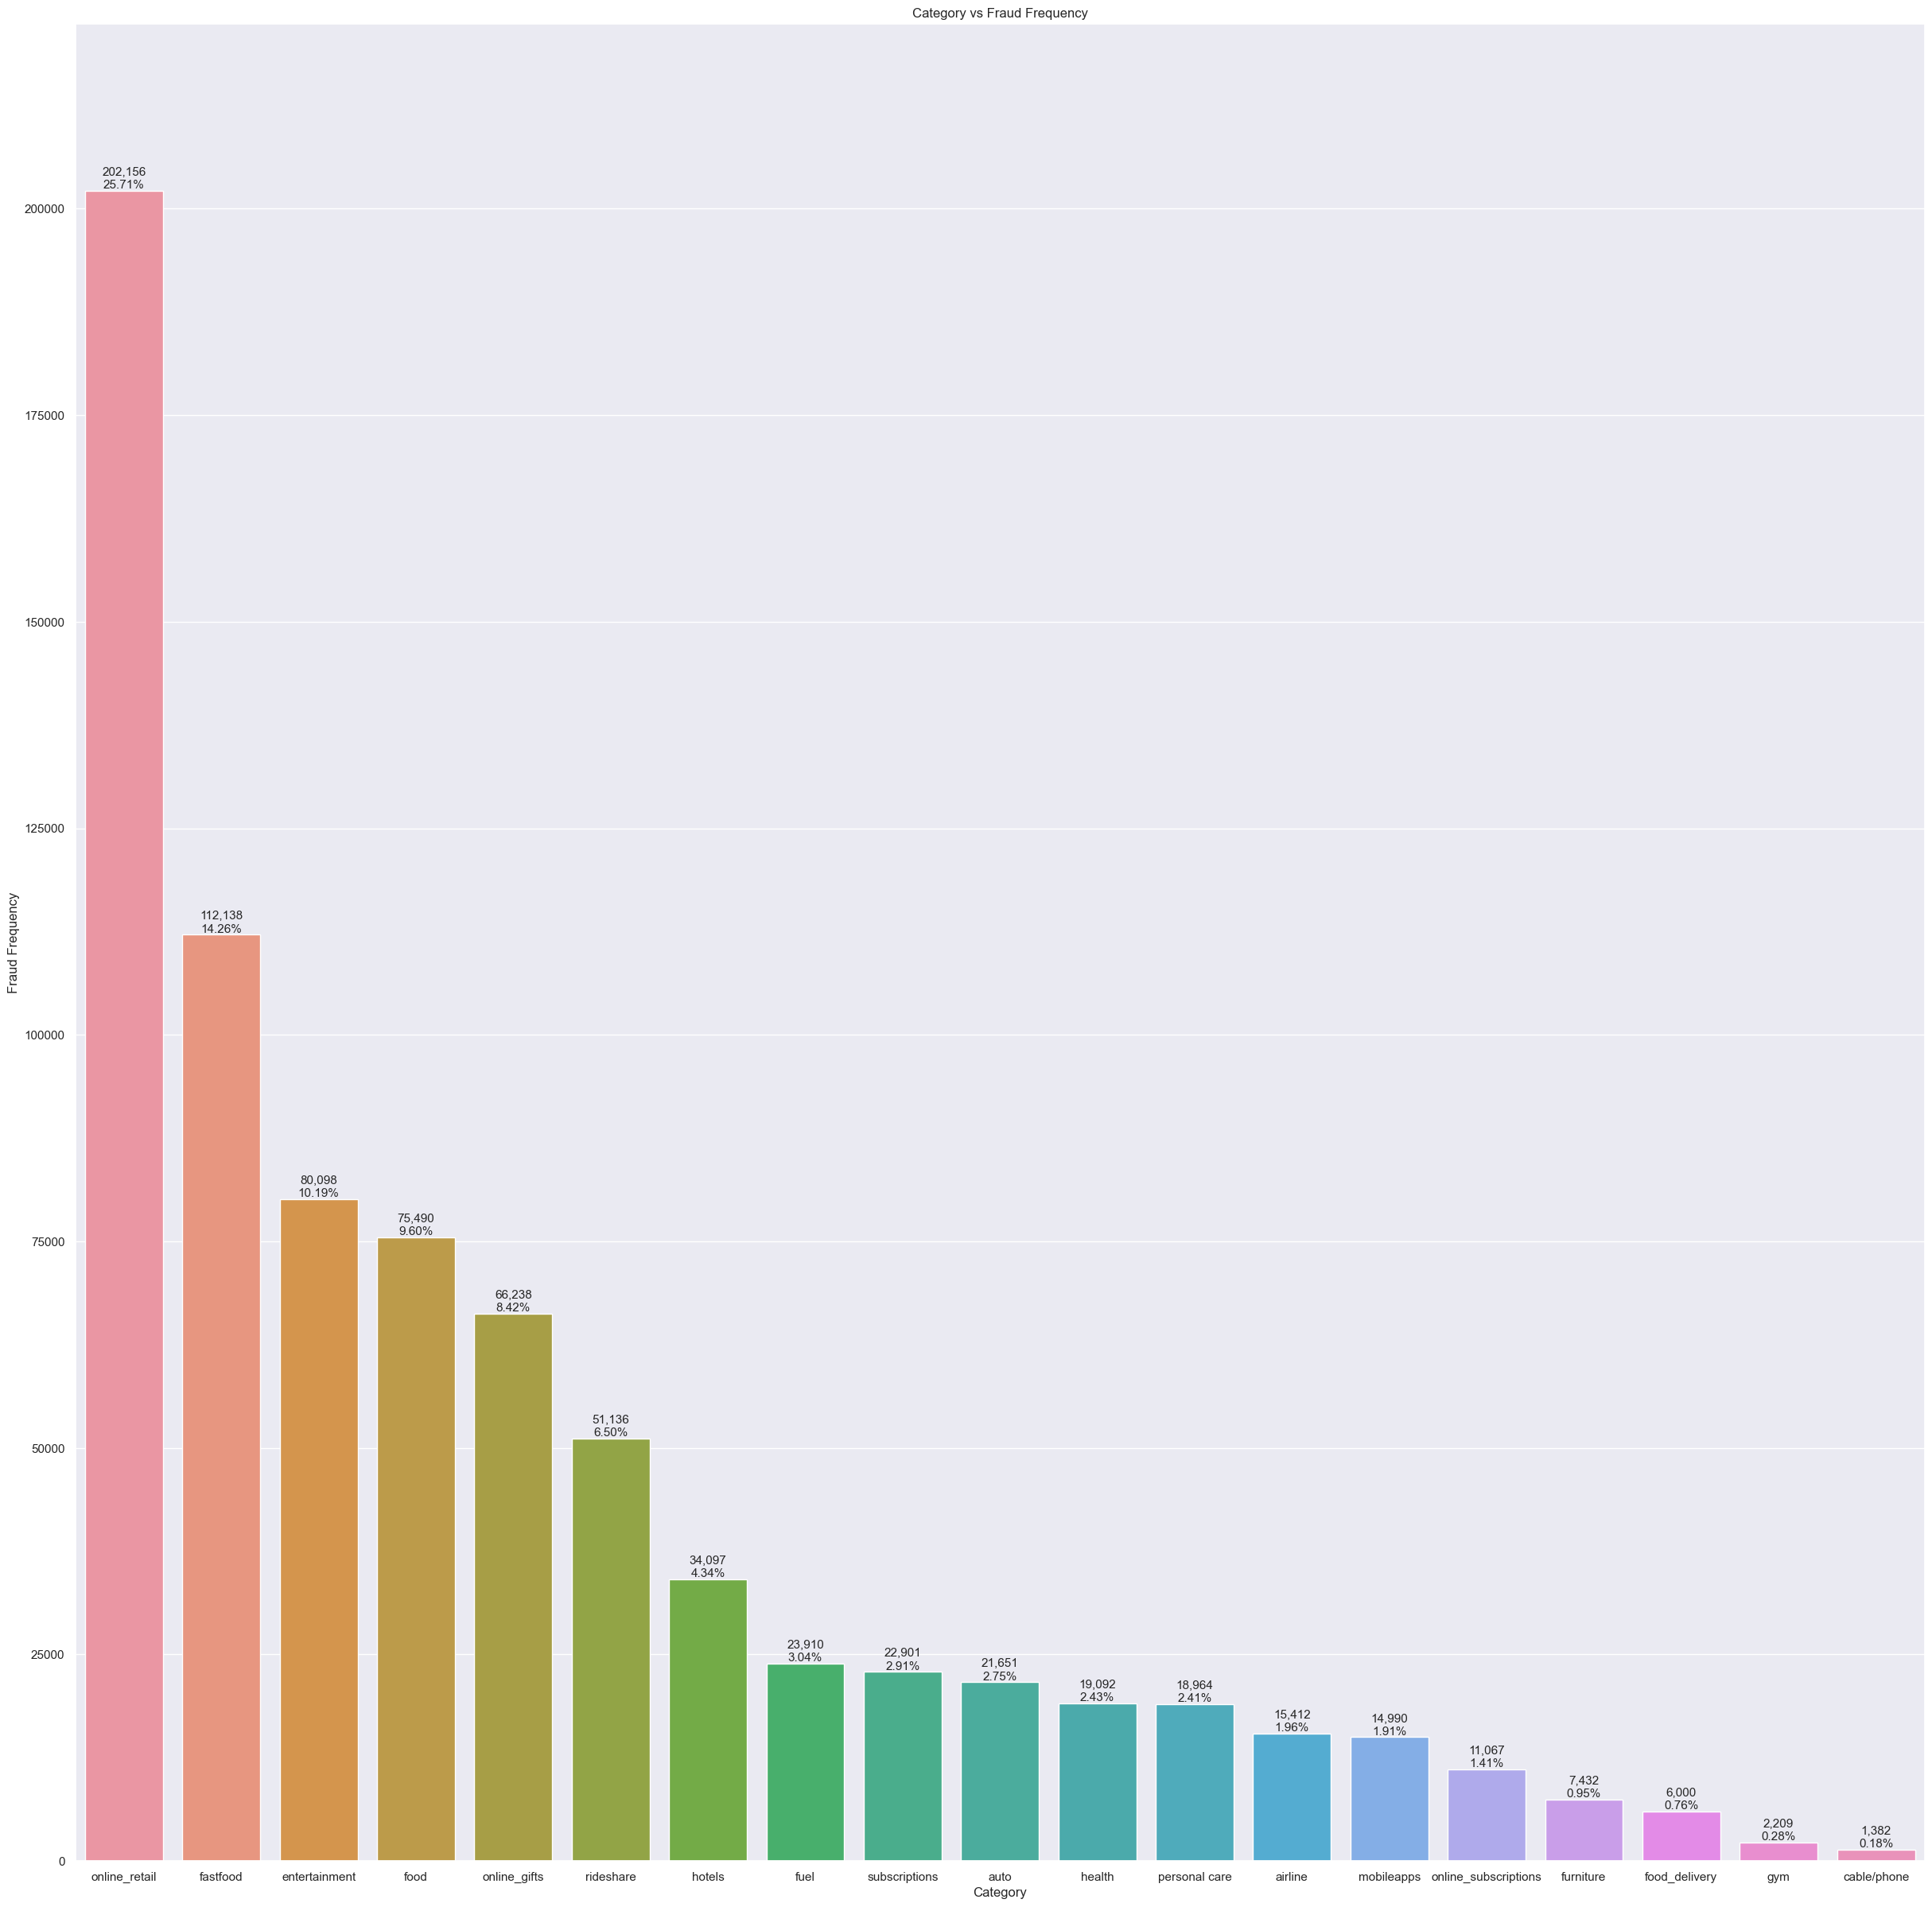

In [12]:
df_graph = pd.DataFrame(trans_updated.groupby('merchantCategoryCode').count()['isFraud']).reset_index(drop=False)
df_graph.columns=['Category','Fraud_Freq']
plt.figure(figsize=(30,30))
sns.set_theme()
axes = sns.barplot(x="Category", y="Fraud_Freq", data=df_graph, order = df_graph.sort_values('Fraud_Freq',ascending = False).Category)
axes.set_title('Category vs Fraud Frequency')
axes.set(xlabel='Category', ylabel='Fraud Frequency')
axes.set_ylim(top=max(df_graph.Fraud_Freq) * 1.10)
for bar, frequency in zip(axes.patches, df_graph.sort_values('Fraud_Freq',ascending = False).Fraud_Freq):
    text_x = bar.get_x() + bar.get_width() / 2.0
    text_y = bar.get_height()
    text = (f'{frequency:,}\n{frequency / sum(df_graph.Fraud_Freq):.2%}')
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

### Note:

* Online Retail, Fastfood and Entertainment merchant category contribute around 50\% of the fradulent cases

## Question 2: Plot

* Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

* Report any structure you find and any hypotheses you have about that structure.

In [13]:
trans_updated.transactionAmount.describe() #Getting idea on the txn data

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

### Note:
* The maximum transaction amount in the data is \\$2011.54
* On an average transaction amounts are: \\$136.99


(0.0, 435140.0)

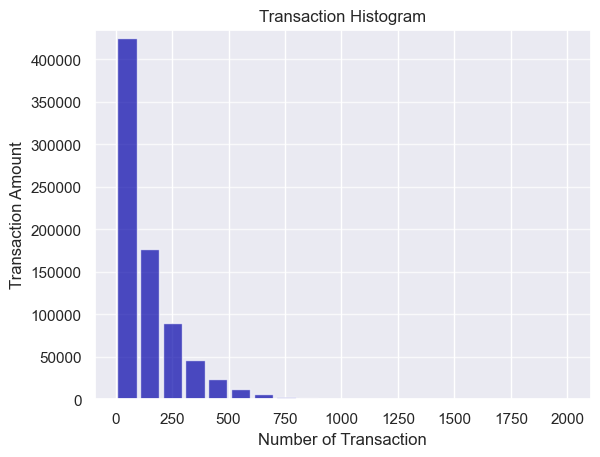

In [14]:
n, bins, patches = plt.hist(x= trans_updated['transactionAmount'], bins=20, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Transaction')
plt.ylabel('Transaction Amount')
plt.title('Transaction Histogram')
max_ = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(max_ / 10) * 10 if max_ % 10 else max_ + 10000)

In [15]:
#Creating amount-wise buckets to look at the distribution

def amt_bucket(amt):
    if amt < 100:
        return '1. <100'
    elif amt >=100 and amt <200:
        return '2. 100 - 200'
    elif amt >=200 and amt <300:
        return '3. 200 - 300'
    elif amt >=300 and amt <500:
        return '4. 300 - 500'    
    else:
        return '5. 500+'

In [16]:
#Summarizing on amount bucket
trans_updated['amtCategory'] = trans_updated['transactionAmount'].apply(amt_bucket)
round(trans_updated.groupby(['amtCategory'])['amtCategory'].count()/len(trans_updated)*100,2)

amtCategory
1. <100         53.88
2. 100 - 200    22.51
3. 200 - 300    11.47
4. 300 - 500     8.91
5. 500+          3.23
Name: amtCategory, dtype: float64

### Note:
* The data is heavily right skewed (lot of transactions have lower data points)
* More than 75% of the transactions have less than \\$200 as their transaction amount
* This means that data is heavily biased towards low transaction amounts
* One hypothesis that can be made about this right-skewed dataset is that it may have a few extreme values or outliers
* Also, when we look at the descriptive standard deviation of the transactionAmount is larger than the mean of the data
* Due to such skewness, it would be recommended to run either non-parameteric tests and perform data transformation (to avoid biasness)
* Even for statistical tests, this would lead to a large p_value thereby nullifiying any statistical significance to the findings even if they would be a significant contributor to fraud detection
* In such cases, we would need to improve the sample size to ensure validity

## Question 3: Data Wrangling

_You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span._

* Can you programmatically identify reversed and multi-swipe transactions?

* What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)

* Did you find anything interesting about either kind of transaction?

In [17]:
# Initial Step is to cull out relevant data pertaining to identifying "reversed" and "multi-swipe" transactions
# For this, the critical data points required would be accountNumber, customerId, merchantName,
# transactionAmount,transactionType,transactionKey, and time and date of transaction
# In all cases here, account number = customerid (which is generally not the case with banks).
# Hence, we can get ride of account numbers safely here.

# The DateTime column has data in form - 2016-08-13T14:27:32 i.e. Date"T"Time. 
# So we would need to split this string to extract them separately

dup_df = trans_updated[['customerId','merchantName','transactionDateTime','transactionAmount','transactionType','Key']] 
dup_df['Date'] = dup_df['transactionDateTime'].apply(lambda x: x.split('T')[0])
dup_df['Time'] = dup_df['transactionDateTime'].apply(lambda x: x.split('T')[1])
dup_df['Date'] = pd.to_datetime(dup_df['Date'])
dup_df['Timestamp'] = pd.to_datetime(dup_df['Date'].astype(str) + ' ' + dup_df['Time'].astype(str))
dup_df.drop('transactionDateTime',axis = 1, inplace = True)

In [18]:
pd.set_option('display.max_columns', None) 
dup_df.sort_values(by=['customerId','merchantName','Timestamp'],ascending=True, inplace = True)
print(dup_df.shape)

(786363, 8)


In [19]:
# Checking the different types of transaction types in data
dup_df.transactionType.unique()

# Here we can see that there is a type "Address Verification" which I believe would have nothing to do with duplicate txn.
# Hence, we can get rid of the same
dup_df = dup_df[dup_df['transactionType'] != 'ADDRESS_VERIFICATION']
dup_df.reset_index(inplace = True, drop = True)
print(dup_df.shape)
dup_df.head()

(766194, 8)


,customerId,merchantName,transactionAmount,transactionType,Key,Date,Time,Timestamp
0,100088067,1st BBQ,200.12,PURCHASE,541917,2016-04-08,19:56:36,2016-04-08 19:56:36
1,100088067,1st Pub,95.11,PURCHASE,541962,2016-11-09,07:26:06,2016-11-09 07:26:06
2,100088067,1st Sandwitch Bar #758805,5.26,PURCHASE,541920,2016-05-06,02:54:01,2016-05-06 02:54:01
3,100088067,34th BBQ #412895,141.60,PURCHASE,541904,2016-02-03,04:48:54,2016-02-03 04:48:54
4,100088067,AMC #191138,304.15,PURCHASE,541925,2016-06-03,18:50:55,2016-06-03 18:50:55


#### Reversal Transactions

In [20]:
#Getting reversal transactions
reversals = dup_df[dup_df['transactionType'] == 'REVERSAL']
reversals.drop('transactionType',axis = 1, inplace = True)
reversals.rename(columns={"Date": "Rev_date", "Time": "Rev_time", "Timestamp":"Rev_timestamp","Key":"Rev_Key"},inplace = True)
reversals.reset_index(drop = True, inplace = True)
reversals.shape

(20303, 7)

In [21]:
#Getting purchase transactions

purchases = dup_df[dup_df['transactionType'] == 'PURCHASE']
purchases.drop('transactionType',axis = 1, inplace = True)
purchases.rename(columns={"Date": "pur_date", "Time": "pur_time", "Timestamp":"pur_timestamp","Key":"pur_Key"},inplace = True)
purchases.reset_index(drop = True, inplace = True)
purchases.shape

(745891, 7)

In [22]:
#Mapping the purchase transactions on the reversals (currently merging )

rev_txn_map = reversals.merge(purchases, on=['customerId','transactionAmount','merchantName'], how = 'left', indicator = True)
print(rev_txn_map.shape)

#Condition: Reversal has to happen post purchase
condition = "(pur_timestamp <= Rev_timestamp)"
rev_txn_map = rev_txn_map.query(condition)
rev_txn_map.reset_index(drop = True, inplace = True)
print(rev_txn_map.shape)
rev_txn_map.head()

(20669, 12)
(18018, 12)


,customerId,merchantName,transactionAmount,Rev_Key,Rev_date,Rev_time,Rev_timestamp,pur_Key,pur_date,pur_time,pur_timestamp,_merge
0,100088067,AMC #79863,22.32,541964,2016-11-20,08:00:04,2016-11-20 08:00:04,541963.0,2016-11-20,07:57:05,2016-11-20 07:57:05,both
1,100328049,Lyft,43.74,87920,2016-01-15,20:36:18,2016-01-15 20:36:18,87919.0,2016-01-15,20:34:35,2016-01-15 20:34:35,both
2,100328049,McDonalds #423357,284.97,87936,2016-03-26,17:35:09,2016-03-26 17:35:09,87935.0,2016-03-24,22:57:15,2016-03-24 22:57:15,both
3,100737756,34th BBQ #436606,93.67,151499,2016-06-06,22:56:52,2016-06-06 22:56:52,151496.0,2016-05-30,00:42:32,2016-05-30 00:42:32,both
4,100737756,Best Bistro #262998,501.29,151541,2016-08-24,20:21:19,2016-08-24 20:21:19,151534.0,2016-08-11,09:20:41,2016-08-11 09:20:41,both


### Note:

* In total, there have been $20,303$ reversal transactions in the dataset, of which $18,018$ could be accurately mapped to a corresponding purchase. 
* The remaining $2,285$ transactions didn't have a purchase mapped back to reversal
* This could be attributed to
    * Data Quality Issue: Considering that this is one entire Transaction Fact table capturing every credit card event, the data load between the server and DB would have had some transmission issues
    * Replication Issue: Generally, at high data organizations like Capital One, we could have an OLTP for loading and OLAP for analytics and similar use-cases. Multiple times there have been issues between these two systems, also acting as a potential source of loading error
    * There could be on or more of the mapping conditions that didn't match, as in the serve didn't record the accurate data for either customer_id, transaction amount or merchant_name (the join conditions) that led to this error
    * Finally, some reversals were not associated with any purchases and hence we couldn't find a tag-back


In [23]:
#For the sum total and count of accurate reversals
print('Total Amount under Reversal accurately mapped: $', round(sum(rev_txn_map.transactionAmount),2))

Total Amount under Reversal accurately mapped: $ 2704309.19


#### Removal of Reversal Duplicates

In [24]:
clean_cc_data_1 = dup_df[~dup_df.Key.isin(rev_txn_map.Rev_Key)]
clean_cc_data_1.shape

(748417, 8)

#### Multi-Swipe Transactions
* Multi-swipe transactions are consecutively charging the customer by the same merchant. 
* This needs to be catered at a customer, merchant level, based on timestamp
* Multiple swipes would mean same transaction recorded in the data within a stipulated time, let's say 5 min --> also the amount has to be same, otherwise multiswipe won't make sense logically
* Also, this only considers purchases and hence reversals not to be considered

* Logic:
    * First find all transactions for a given combo of CustomerId, MerchantName and Amount > 1 i.e. repetitions in purchases
    * Take all transactions from base table where repeated transactions for the above combo
    * Find the difference between timestamp of consecutive transactions and cull out cases where this difference is less than 300 seconds (i.e. 5 min)
    * These would be "Multi-Swipe" transactions; and we need to remove them from the txn data

In [25]:
txn_mlt_swp = clean_cc_data_1
txn_mlt_swp.shape

(748417, 8)

In [26]:
txn_mlt_swp.sort_values(by=['customerId','merchantName','transactionAmount','Timestamp'],ascending=True, inplace = True)

cust_merch = pd.DataFrame(txn_mlt_swp.groupby(['customerId','merchantName','transactionAmount']).count()['Timestamp'])
cust_merch= cust_merch.reset_index()
cust_merch.columns = ['customerId','merchantName','Amt','Freq']
print(cust_merch.shape)
mlt_cust_merch = cust_merch[cust_merch.Freq > 1] #Getting cases where for a given combo of CustomerId, MerchantName and Amount > 1 i.e. repetitions
#Creating a new id for referential purposes
mlt_cust_merch['Id'] = mlt_cust_merch.customerId.astype(str) +"-"+ mlt_cust_merch["merchantName"] +"-"+mlt_cust_merch["Amt"].astype(str)
mlt_cust_merch.head()

(697541, 4)


,customerId,merchantName,Amt,Freq,Id
13,100088067,Apple iTunes,3.96,8,100088067-Apple iTunes-3.96
37,100088067,Fresh Flowers,411.35,2,100088067-Fresh Flowers-411.35
55,100088067,Shell Gas #256420,60.41,5,100088067-Shell Gas #256420-60.41
64,100108752,Shell Gas #494785,45.35,10,100108752-Shell Gas #494785-45.35
117,100328049,Mobil Gas #841292,22.70,7,100328049-Mobil Gas #841292-22.7


In [27]:
txn_mlt_swp.sort_values(by=['customerId','merchantName','transactionAmount','Timestamp'],ascending=True, inplace = True)

In [28]:
#Only Purchase Transactions to be considered
pur_mlt = txn_mlt_swp[txn_mlt_swp.transactionType == 'PURCHASE']
pur_mlt.reset_index(inplace = True, drop = True)
#Creating a new id for referential purposes
pur_mlt['Id'] = pur_mlt.customerId.astype(str) +"-"+ pur_mlt["merchantName"] +"-"+pur_mlt["transactionAmount"].astype(str)
mlt_scope = pur_mlt[pur_mlt.Id.isin(mlt_cust_merch.Id)]     
mlt_scope.head()

,customerId,merchantName,transactionAmount,transactionType,Key,Date,Time,Timestamp,Id
13,100088067,Apple iTunes,3.96,PURCHASE,541919,2016-05-05,22:47:50,2016-05-05 22:47:50,100088067-Apple iTunes-3.96
14,100088067,Apple iTunes,3.96,PURCHASE,541926,2016-06-05,22:10:41,2016-06-05 22:10:41,100088067-Apple iTunes-3.96
15,100088067,Apple iTunes,3.96,PURCHASE,541929,2016-07-05,22:22:49,2016-07-05 22:22:49,100088067-Apple iTunes-3.96
16,100088067,Apple iTunes,3.96,PURCHASE,541936,2016-08-05,00:55:48,2016-08-05 00:55:48,100088067-Apple iTunes-3.96
17,100088067,Apple iTunes,3.96,PURCHASE,541945,2016-09-05,13:14:22,2016-09-05 13:14:22,100088067-Apple iTunes-3.96


In [29]:
mlt_scope['time_diff'] = mlt_scope.groupby(['customerId','merchantName','transactionAmount'])['Timestamp'].diff()
mlt_scope['time_diff'] = mlt_scope['time_diff'].dt.total_seconds().fillna(999999999) #Garbage value for initial transaction

mlt_final_full_data = mlt_scope[(mlt_scope['time_diff'] <= 300) | (mlt_scope['time_diff'] == 999999999)] #Garbage value for initial transaction
mlt_final = mlt_scope[mlt_scope['time_diff'] <= 300]
mlt_final.shape

(7457, 10)

In [30]:
full_clean_cc_data = clean_cc_data_1[~(clean_cc_data_1.Key.isin(mlt_final.Key))]
print(full_clean_cc_data.shape)
full_clean_cc_data.head()

(740960, 8)


,customerId,merchantName,transactionAmount,transactionType,Key,Date,Time,Timestamp
0,100088067,1st BBQ,200.12,PURCHASE,541917,2016-04-08,19:56:36,2016-04-08 19:56:36
1,100088067,1st Pub,95.11,PURCHASE,541962,2016-11-09,07:26:06,2016-11-09 07:26:06
2,100088067,1st Sandwitch Bar #758805,5.26,PURCHASE,541920,2016-05-06,02:54:01,2016-05-06 02:54:01
3,100088067,34th BBQ #412895,141.60,PURCHASE,541904,2016-02-03,04:48:54,2016-02-03 04:48:54
4,100088067,AMC #191138,304.15,PURCHASE,541925,2016-06-03,18:50:55,2016-06-03 18:50:55


## Question 4: Model

_Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices._

* Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).

* Provide an estimate of performance using an appropriate sample, and show your work.

* Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

In [31]:
# Getting all features from the initial set

model_df = trans_updated[trans_updated.Key.isin(full_clean_cc_data.Key.unique())]
print('Rows eliminated due to duplication:',len(trans_updated) - len(model_df))

Rows eliminated due to duplication: 45403


<AxesSubplot:title={'center':'Transaction Amount Influence on Fraudulent Transactions'}, xlabel='isFraud', ylabel='transactionAmount'>

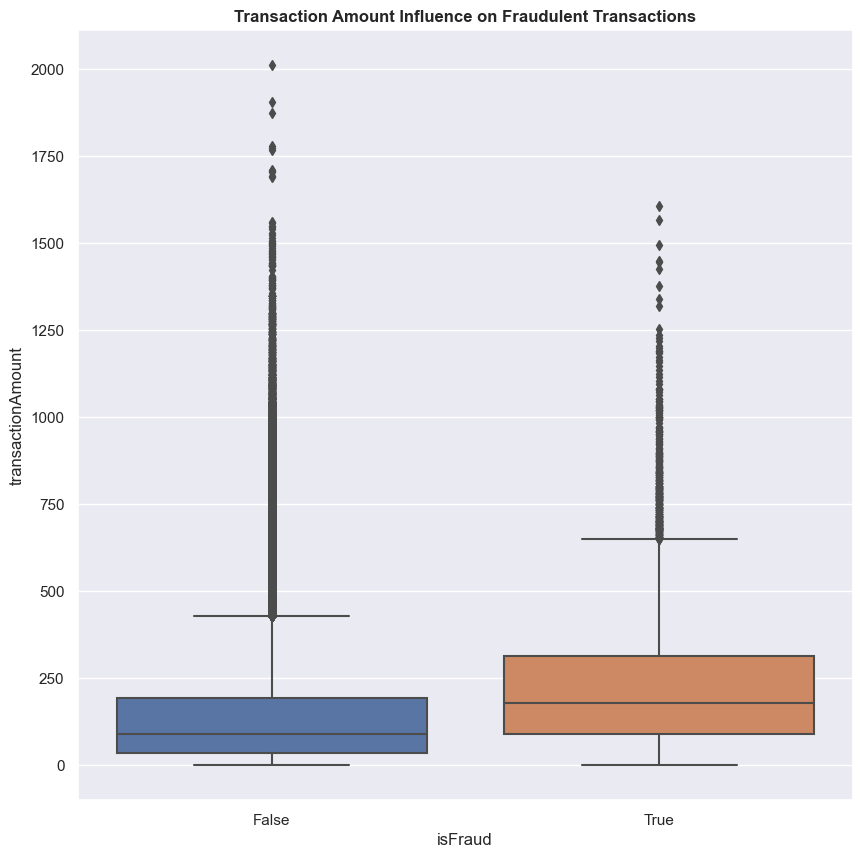

In [32]:
plt.figure(figsize=(10,10))
plt.title('Transaction Amount Influence on Fraudulent Transactions',weight='bold')
sns.set()
sns.boxplot(x='isFraud', y='transactionAmount', data=model_df)

In [33]:
print('The fraud rate in the data is:', round(model_df.isFraud.sum()/len(model_df)*100,2),'%')
print('This means that the data is imbalanced')

The fraud rate in the data is: 1.6 %
This means that the data is imbalanced


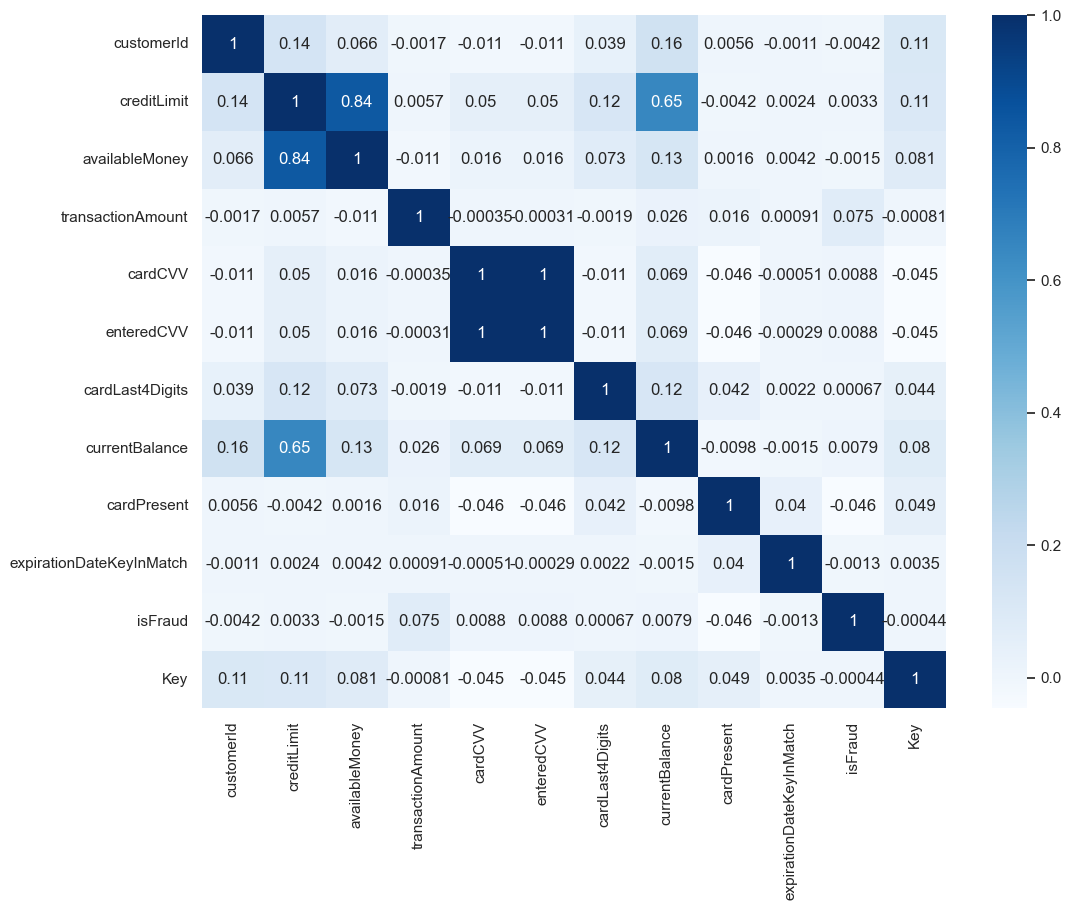

In [34]:
# Correlation matrix
# ignoring last column 
plt.figure(figsize=(12,9))
correlation_mat = model_df.corr()
# correlation
sns.heatmap(correlation_mat, annot = True,cmap = "Blues") #coding the heatmap from the correlation data martix.
plt.show()

In [35]:
from datetime import date, datetime

model_df['Timestamp'] = pd.to_datetime(model_df['transactionDateTime'].apply(lambda x: x.split('T')[0]).astype(str) + ' ' + model_df['transactionDateTime'].apply(lambda x: x.split('T')[1]).astype(str))
model_df['accountOpenDate'] = pd.to_datetime(model_df['accountOpenDate'], format='%Y-%m-%d')
model_df['Days_since_acct_open'] = (pd.to_datetime(date(2016,12,31)) - model_df['accountOpenDate']).dt.days
model_df.drop('accountOpenDate',axis = 1)
model_df.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Key,amtCategory,Timestamp,Days_since_acct_open
0,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,0,1. <100,2016-08-13 14:27:32,658
1,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,1,1. <100,2016-10-11 05:05:54,658
2,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2,1. <100,2016-11-08 09:18:39,658
3,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,3,1. <100,2016-12-10 02:14:50,658
4,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,4,1. <100,2016-03-24 21:04:46,513


In [36]:
# Drop features that don't intuitively influence fraudulency

#enteredCVV and cardCVV has a correlation of 1, so no use adding it to model
labels = ['customerId', 'merchantName','transactionDateTime', 'posEntryMode', 'posConditionCode', 'dateOfLastAddressChange',
          'currentExpDate', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'cardPresent','expirationDateKeyInMatch','amtCategory','Key','Timestamp']
model_df_truncated = model_df.drop(labels=labels, axis=1)
model_df_truncated

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,merchantCategoryCode,accountOpenDate,transactionType,currentBalance,isFraud,Days_since_acct_open
0,5000,5000.00,98.55,US,US,rideshare,2015-03-14,PURCHASE,0.00,False,658
1,5000,5000.00,74.51,US,US,entertainment,2015-03-14,PURCHASE,0.00,False,658
2,5000,5000.00,7.47,US,US,mobileapps,2015-03-14,PURCHASE,0.00,False,658
3,5000,5000.00,7.47,US,US,mobileapps,2015-03-14,PURCHASE,0.00,False,658
4,5000,5000.00,71.18,US,US,fastfood,2015-08-06,PURCHASE,0.00,False,513
...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,119.92,US,US,rideshare,2012-08-23,PURCHASE,1095.04,False,1591
786359,50000,48785.04,18.89,US,US,online_subscriptions,2012-08-23,PURCHASE,1214.96,False,1591
786360,50000,48766.15,49.43,US,US,rideshare,2012-08-23,PURCHASE,1233.85,False,1591
786361,50000,48716.72,49.89,US,US,online_retail,2012-08-23,PURCHASE,1283.28,False,1591


In [46]:
#Splitting between X and y values
y_old = model_df_truncated['isFraud']
X_old = model_df_truncated.drop('isFraud',axis = 1)

### Note:

Undersampling techniques are used for imbalanced data when the size of the majority class is much larger than the size of the minority class. Here are some reasons why undersampling techniques can be useful:

* __Reducing computation time__: When working with imbalanced datasets, algorithms tend to focus on the majority class, resulting in longer computation times. By reducing the size of the majority class through undersampling, computation time can be significantly reduced.

* __Reducing overfitting__: When the majority class is much larger than the minority class, the algorithm can become overfit to the majority class, resulting in poor performance on the minority class. By undersampling the majority class, the algorithm is forced to pay more attention to the minority class, which can reduce overfitting and improve performance.

* __Improving model performance__: Undersampling the majority class can lead to a more balanced dataset, which can improve model performance on the minority class. By reducing the class imbalance, the algorithm can learn more effectively from the minority class, resulting in better predictions.

* __Addressing bias__: Undersampling can help address bias towards the majority class by balancing the representation of the minority and majority classes. This can improve the fairness and accuracy of the model predictions.

In [50]:
import imblearn

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X, y = rus.fit_resample(X_old, y_old)

print('original dataset shape:', len(X_old))
print('Resample dataset shape', len(X))

original dataset shape: 740960
Resample dataset shape 23736


In [51]:
#Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cat_col=['acqCountry', 'merchantCountryCode', 'merchantCategoryCode', 'transactionType']

for i in X.columns:
    if(i not in cat_col):
        X[i]=scaler.fit_transform(X[[i]]).ravel()

X = pd.get_dummies(X,columns=cat_col)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_new = X_train.iloc[:1000,:]
y_new = y_train.iloc[:1000]

(17802, 35)
(17802,)
(5934, 35)
(5934,)


In [54]:
X_train.head()

,creditLimit,availableMoney,transactionAmount,accountOpenDate,currentBalance,Days_since_acct_open,acqCountry_CAN,acqCountry_MEX,acqCountry_PR,acqCountry_US,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL
12056,-0.903187,-0.677387,-0.930620,0.460397,-0.692606,-0.460397,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
19766,0.352481,-0.541120,-0.118969,0.578259,1.298553,-0.578259,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15003,0.352481,0.551766,0.708813,-1.873266,-0.096596,1.873266,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
10019,-0.498819,-0.450144,0.265579,0.432405,-0.285457,-0.432405,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8318,-0.498819,-0.286896,-0.331977,-0.731480,-0.493856,0.731480,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Why use XGBoost or Random Forest here ?

* Random Forest and XGBoost are popular algorithms for handling imbalanced datasets due to their ability to handle class imbalance effectively. They are used because -

1. __Tree-based algorithms__: Both Random Forest and XGBoost are tree-based algorithms that are capable of creating multiple decision trees from a given dataset. This enables them to capture complex relationships between features and target variables.

2. __Ensemble learning__: These algorithms are based on ensemble learning, which involves combining multiple models to improve the overall performance. This approach helps to reduce the impact of class imbalance by allowing the model to learn from both the majority and minority classes.

3. __Sampling techniques__: Random Forest and XGBoost use various sampling techniques that help to address class imbalance. For example, they use bootstrap sampling and feature subsampling to create diverse subsets of the training data, which are then used to train individual decision trees. This reduces the impact of noisy and irrelevant features, and helps to prevent overfitting.

4. __Class weighting__: Both algorithms also support class weighting, which assigns a higher weight to the minority class to give it more importance during training. This helps to balance the influence of the majority and minority classes, and prevent the model from being biased towards the majority class.

In summary, Random Forest and XGBoost are effective algorithms for handling imbalanced datasets because they can create diverse decision trees, use sampling techniques to reduce overfitting, and support class weighting to balance the impact of different classes.

## Random Forest Classifier

In [93]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
# hyperparameter tuning
params = {'n_estimators': [400,600,800], 'min_samples_split': [6,8,10], 'max_depth': [5,10,15]}

In [95]:
# create random forest classifier model
rf = RandomForestClassifier()

# set up random search meta-estimator
# this will train 50 models over 4 folds of cross validation (200 models total)
rf_clf = RandomizedSearchCV(rf, params, n_iter=10, cv=5, scoring='f1',random_state=99)

# train the random search meta-estimator to find the best model out of 100 candidates
rf_model = rf_clf.fit(X_train, y_train)

rf_model.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=8, n_estimators=800)

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

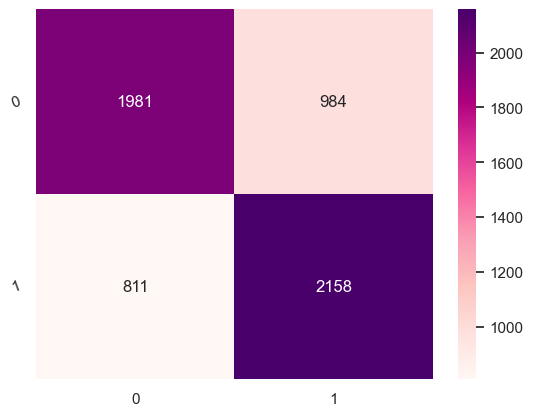

In [97]:
rf_class =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#Train the model and predict on the test
rf_class.fit(X_train,y_train)

y_pred = rf_class.predict(X_test)

# Visualize confusion matrix
CM = confusion_matrix(y_test, y_pred)

sns.heatmap(CM, annot=True, fmt='d', cmap='RdPu')
plt.yticks(rotation=20)

In [98]:
# check precision rate score on validation data
print("Precision Score:",round(precision_score(y_test, y_pred),4)) 
# check f1 score on validation data
print("F-1 Score:",round(f1_score(y_test, y_pred),4))
# check recall rate score on validation data
print("Recall Score:",round(recall_score(y_test, y_pred),4))

Precision Score: 0.6868
F-1 Score: 0.7063
Recall Score: 0.7268


## XGBoost Classifier

In [66]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [96]:
estimator = xgb.XGBClassifier(objective= 'binary:logistic', nthread=4, seed=123)
parameters=  { 'max_depth': range(2,20,7), 'n_estimators': range(100, 1000, 200), 'learning_rate': [0.1, 0.001, 0.0001]}
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='f1', n_jobs = 10, cv = 4, verbose=True)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 4 folds for each of 45 candidates, totalling 180 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

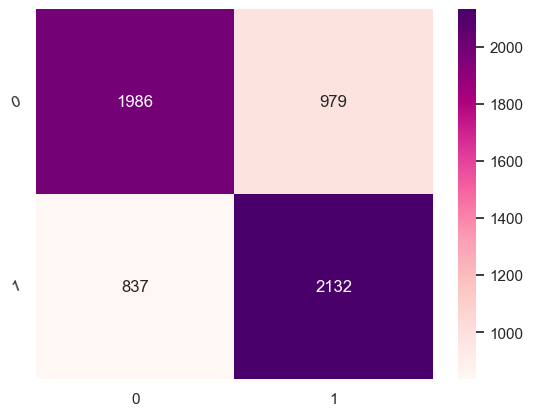

In [100]:
xgb_cl = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=np.nan, n_estimators=100, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

#Fit the model
xgb_cl.fit(X_train,y_train)

#Predict the model
preds = xgb_cl.predict(X_test)

# visualize confusion matrix with seaborn heatmap
CM_xgb=confusion_matrix(y_test, preds)
sns.heatmap(CM_xgb, annot=True, fmt='d',cmap = 'RdPu')
plt.yticks(rotation=20)

In [101]:
# check precision rate score on validation data
print("Precision Score:",round(precision_score(y_test, preds),4)) 
# check f1 score on validation data
print("F-1 Score:",round(f1_score(y_test, preds),4))
# check recall rate score on validation data
print("Recall Score:",round(recall_score(y_test, preds),4))

Precision Score: 0.6853
F-1 Score: 0.7013
Recall Score: 0.7181


Text(0.5, 0, 'Xgboost Features Critical')

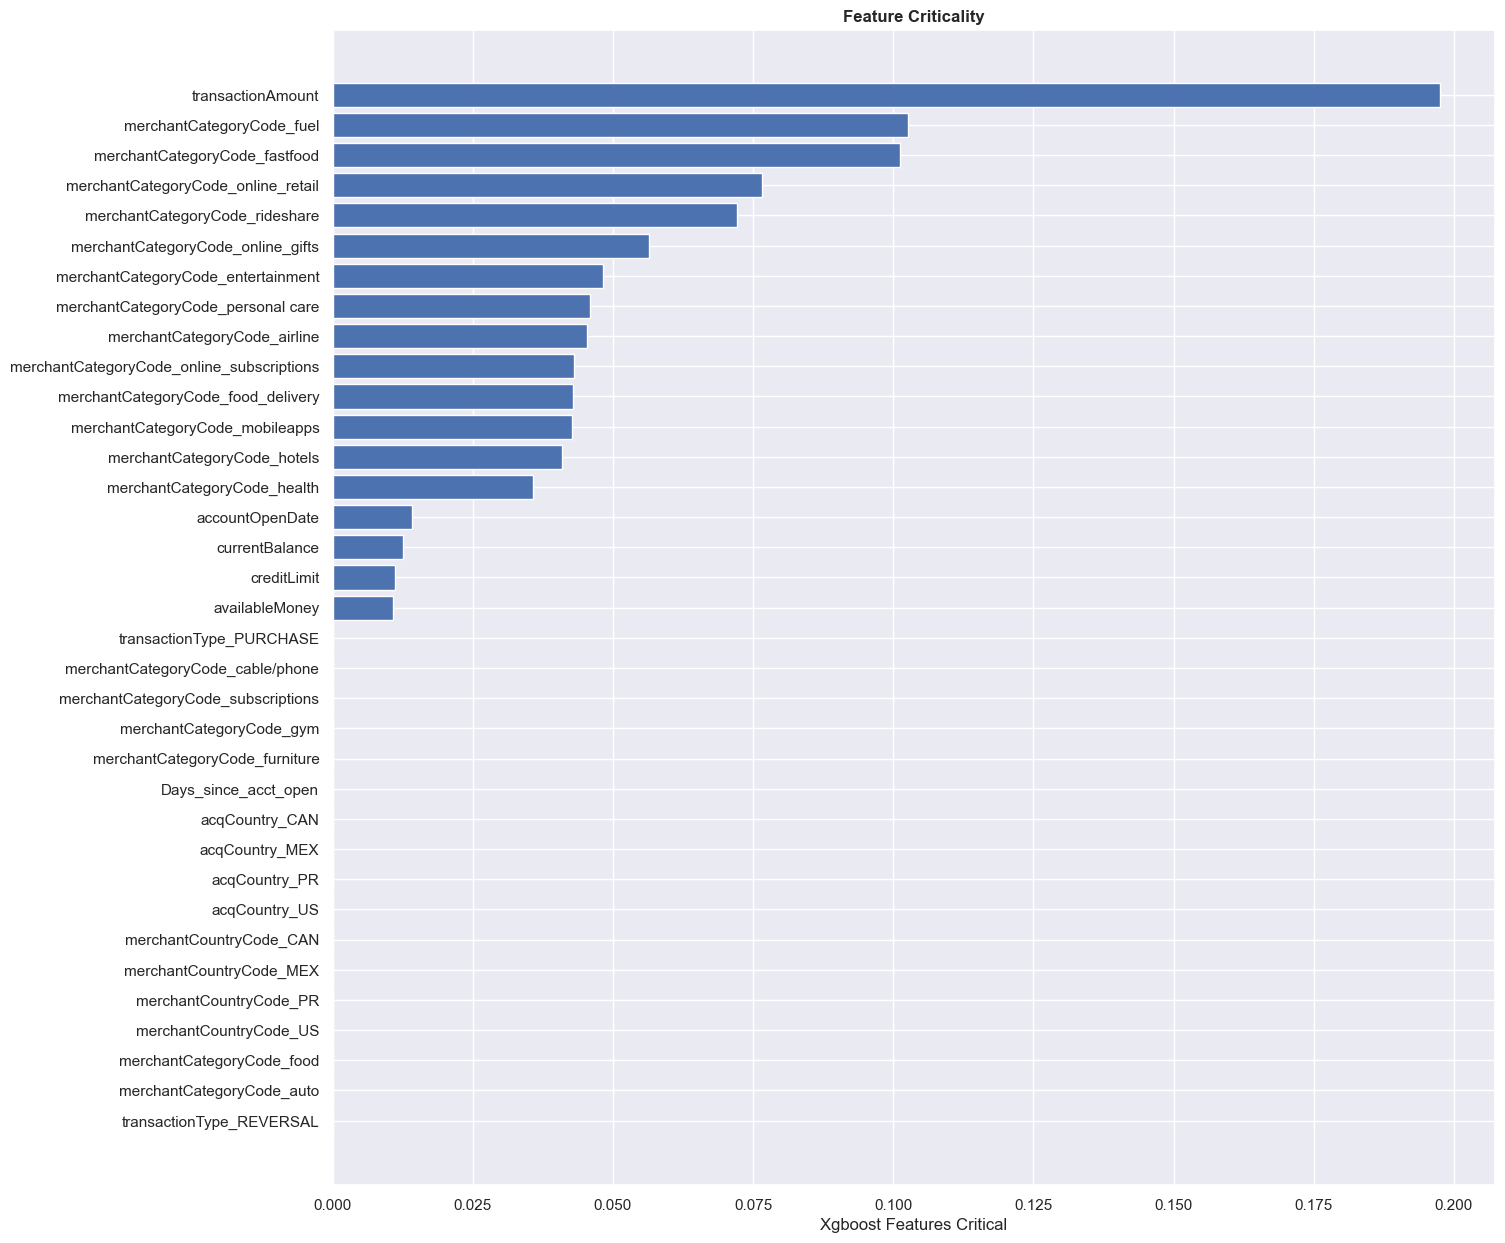

In [92]:
plt.figure(figsize=(15,15))
plt.title('Feature Criticality',weight='bold')
sns.set()
indices = xgb_cl.feature_importances_.argsort()
plt.barh(X_train.columns[indices], xgb_cl.feature_importances_[indices])
plt.xlabel("Xgboost Features Critical")

### Note:

* Transaction Amount stands as the most critical parameter via XGBoost Method
* Here, `recall` should be ideal metric for consideration, as false negatives in default are more costlier than false positives
* Random Forest seems to be giving marginally better results than XGBoost

### Why Random Forest Performed Better over XGBoost here ?

* __Data here is small (Post UnderSampling)__: Random Forest can perform well on small datasets as it is less prone to overfitting than XGBoost. XGBoost is known to overfit on small datasets, which can lead to poor performance on the test data.

* __Data is a mixture of categorical and numerical__: Random Forest can handle both categorical and numerical features well. In contrast, XGBoost is more suitable for numerical data.